# Übung 3

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### 3.1 Polynomielle Regression (mit nonlinear feature transform)
In dieser Übung werden Sie sehen, wie wir mit nichtlineare Transformationen in Kombination mit linearer Regression eine nichtlineare Target Function lernen können. Die nichtlineare Transformation, die wir betrachten werden, bildet Features in die Basis der Monome (Potenzen von x) ab. Wir werden die Ergebnisse dieser Übungsaufgabe in der nachfolgenden Aufgabe 3.2 benutzen, um Overfitting zu untersuchen. Für die Bearbeitung dieser Aufgabe benötigen Sie Ihren Code (oder Code Ihrer Kollegen) für lineare Regression.

**Ihre Aufgaben**

(1) Wir haben es mit einem Regressionsproblem zu tun. Beschäftigen wir uns zunächst mit den Daten. Wie viele Datenpunkte hat Ihr Datensatz? Wie viele Features hat jeder Datenpunkt?

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from numpy.polynomial import Polynomial

def get_target_function():
    return Polynomial((1, 2, -1, -2))


def get_data(sigma=0, N=5):
    np.random.seed(3)
    p = Polynomial((1, 2, -1, -2))
    x = np.sort(np.random.random_sample(size=N) * 2 - 1)
    noise = np.random.standard_normal(len(x))
    return x, p(x) + noise*sigma


X_3_1, y_3_1 = get_data()

(2) Visualisieren Sie in einem [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) die Features und die dazugehörigen Labels. Nutzen Sie die Funktion `get_target_function`, um die Ihnen unbekannte Target Function im [Interval](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) $x\in[-1, 1]$ zusätzlich in den Plot [einzuzeichnen](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html?highlight=plot#module-matplotlib.pyplot).

**Tip:**
Sie können sich den mathematischen Ausdruck hinter der `target_function` mit einem `print()` genauer anschauen.

(5,)


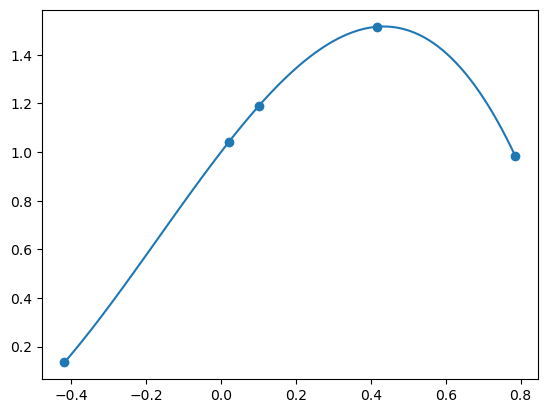

In [4]:
print(X_3_1.shape)

x = np.linspace(X_3_1.min(), X_3_1.max(), 100)
plt.scatter(X_3_1, y_3_1)
plt.plot(x, get_target_function()(x))

(3) Sie haben in Teilaufgabe (2) gesehen, dass Ihre Target Function nichtlinear ist. Wir werden daher eine nonlinear Feature Transformation implementieren, um ein Modell an die Daten zu fitten. Schlagen Sie noch einmal kurz in Ihren Vorlesungsfolien nach, was eine nonlinear feature transform macht. Implementieren Sie dann eine Funktion `phi4`, die die nichtlineare Feature Transformation $$\Phi_4(x) = (x^1, x^2, x^3, x^4)$$ durchführt, also Daten $x$ entgegennimmt und die transformierten Features zurückgibt. Die zurückgegebene Datenmatrix wird die Dimension Nx4 haben, also N Datenpunkten mit je 4 Features zurückgeben.

**Hinweise:**
- Sie werden die Zahl "1" zu Beginn jedes Datenpunkts, die für den Bias Term in der linearen Regression benötigt wird, später bei der Implementierung der Regression hinzufügen.
- Bei den hochgestellten Zahlen in $(x^1, x^2, x^3, x^4)$ handelt es sich um Exponenten (und nicht um Indizes).
- Sie fragen sich, wie man auf eine nichtlineare Transformation wie $\Phi_4$ kommt? Das ist nicht trivial, aber wir werden das Finden solcher Transformationen in einem späteren Lernmodell, der Support Vector Machine, automatisieren.

In [5]:
def phi4(x):
    return np.array([x, x**2, x**3, x**4])

(4) Schlagen Sie noch einmal in den Vorlesungsfolien nach, wie lineare Regression definiert ist (insbesondere wie das Hypothesenset definiert ist). Wie viele Einträge hat der Gewichtsvektor $w_\text{lin}$ Ihrer finalen Hypothese, wenn Sie die Features wie in Teilaufgabe (3) transformieren (vergessen Sie nicht den Bias-Term!)?

(5) Transformieren Sie die Daten $x$ mit `phi4` und führen Sie auf den transformierten Daten mithilfe Ihres Codes für lineare Regression eine Regression durch. Sie erhalten dadurch den Gewichtsvektor $w_\text{lin}$, der Ihnen die finale Hypothese definiert.

* Bitte beachten Sie, dass Sie ggf. Ihren Code für lineare Regression anpassen müssen.

In [6]:
X = np.array([ phi4(x) for x in X_3_1])
print(X)

[[-4.18190522e-01  1.74883313e-01 -7.31345439e-02  3.05841731e-02]
 [ 2.16552104e-02  4.68948137e-04  1.01551706e-05  2.19912355e-07]
 [ 1.01595805e-01  1.03217076e-02  1.04864220e-03  1.06537648e-04]
 [ 4.16295645e-01  1.73302064e-01  7.21448947e-02  3.00336055e-02]
 [ 7.85893909e-01  6.17629236e-01  4.85391054e-01  3.81465873e-01]]


(6) Implementieren Sie die Funktion `get_final_g`, die einen beliebigen nicht-transformierten $x$-Wert sowie den Gewichtsvektor $w_\text{lin}$ entgegennimmt und den Funktionswert $y$ zurückgibt.

In [7]:
def get_final_g(x, w):
    return np.dot(x,w)

(7) Visualisieren Sie in einem Plot in zwei unterschiedlichen Farben Ihre finale Hypothese (nutzen Sie dazu `get_final_g`) sowie die tatsächliche Target Function (nutzen Sie dazu `get_target_function`). Was stellen Sie fest?

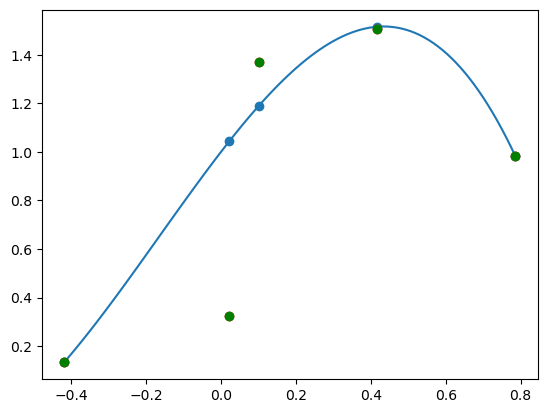

In [8]:
def linear_regression(X, b):
    return np.linalg.inv(X.T @ X) @ X.T @ b

w = linear_regression(X, y_3_1)

def predict(X, w):
    return X @ w

y_pred = predict(X, w)

plt.scatter(X_3_1, y_3_1)
plt.plot(x, get_target_function()(x))
plt.plot(X_3_1, y_pred, 'ro')
plt.plot(X_3_1, [get_final_g(phi4(xi), w) for xi in X_3_1], 'go')

### 3.2 Overfitting - Teil 1: Rauschkontamination

Overfitting ist eines der wichtigsten Konzepte im Machine Learning, und in dieser Übung werden Sie sich eingehender damit beschäftigen. Wir werden als Anschauungsobjekt *Polynomielle Regression* nutzen (aus Übung 3.1), um Overfitting zu untersuchen. Für die Bearbeitung benötigen Sie Ihren Code (oder Code Ihrer Kollegen) für lineare Regression sowie Code aus Übung 3.1.

Die Daten $\mathcal{D}$, mit denen wir arbeiten werden, wird Ihnen von der unten angegebenen Funktion `get_data` erzeugt.

**Ihre Aufgaben**

(1) Untersuchen Sie den unten dargestellten Datensatz: Visualisieren Sie in einem Plot die Target Function sowie zusätzlich im selben Plot die Daten, die Ihnen die Funktion `get_data` zur Verfügung stellt. Können Sie in Ihrem Plot erkennen, dass die Daten mit Rauschen kontaminiert sind?

In [9]:
X_3_2, y_3_2 = get_data(N=5,sigma=1)

(2) Nutzen Sie Ihren Code aus Aufgabe 3.1, um die Featuredaten nichtlinear mithilfe von `phi4` zu transformieren. Führen Sie dann auf diesen transformierten Daten mithilfe Ihres Codes eine lineare Regression durch und erhalten Sie damit den Gewichtsvektor $w_\text{lin}$.

(3) Visualisieren Sie mithilfe von `get_final_g` Ihre aus Schritt (2) ermittelte finale Hypothese sowie zusätzlich im selben Plot die Target Function. Was fällt Ihnen auf? Fokussieren Sie sich auf zwei Untersuchungen:
1. Beschreibt Ihre finale Hypothese Ihre Daten $\mathcal{D}$ gut oder schlecht?
2. Beschreibt Ihre finale Hypothese die Target Function gut oder schlecht?

(4) **Nutzen Sie Begriffe aus der Vorlesung, um die Phänomene, die Sie in Schritt (3) beobachtet haben, zu beschreiben.** Nennen Sie die Ursache für das Phänomen, das Sie beobachtet haben.

(5) Schreiben Sie eine Funktion, die den Fehler $E_\text{out}$ im Interval $x\in[-1, 1]$ Ihrer Hypothese ermittelt. Sei $y(x)$ der Wert der Target Function an der Stelle $x$ und sei $g(x)$ der Wert Ihrer finalen Hypothese an der Stelle $x$. Dann sei der Out-of-Sample Fehler $E_\text{out}$ im Interval $x\in[-1, 1]$ definiert als die mittlere quadratische Abweichung zwischen $g$ und $y$ in diesem Interval,
$$E_\text{out} = \frac{1}{K}\sum_k (g(x_k) - y(x_k))^2,$$
wobei wir hier $K=50$ Stützstellen $x_k$ wählen, die das Interval $[-1, 1]$ gleichmäßig in [äquidistanten Abständen abtasten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html).

(6) Die Stärke der Kontamination mit Rauschen, die die Daten $\mathcal{D}$ erfahren, wird im Funktionsaufruf `get_data` mit dem Parameter `sigma` ($\sigma$) eingestellt. Je größer $\sigma$ gewählt wird, desto stärker die Rauschkontamination der Daten. Messen Sie den Out-of-Sample Fehler $E_\text{out}$ (wie in Schritt (5) formuliert) als Funktion von $\sigma$ ($\sigma\in\{0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2\}$) und visualisieren Sie diesen Zusammenhang.

### 3.3 Overfitting - Teil 2: Target Komplexität

Diese Übung ist eine Fortsetzung von Übung 3.2, in der wir das Phänomen "Overfitting" noch einmal genauer untersuchen werden. Für die Bearbeitung benötigen Sie Code aus der vorherigen Übung. Wieder werden Sie Overfitting anhand polynomieller Regression untersuchen. Dieses Mal interessieren wir uns allerdings nicht für einen Datensatz $\mathcal{D}$, der mit Rauschen kontaminiert ist, sondern für eine Target Function, deren Target Komplexität wir einstellen können.

**Ihre Aufgaben**

(1) Betrachten Sie die unten angegebene Code-Zeile und darin die neue Funktion `get_target_function_3_3`, die die Target Function implementiert. Die Target Function ist - wie in der Übung 3.2 - ein Polynom. Was passiert mit der Polynomordnung, wenn der Parameter `Qf` größer als 4 wird?

In [10]:
def get_target_function_3_3(Qf=6):
    Q = 4 if Qf < 4 else Qf
    degrees = np.array([1, 2, -1, -2])
    if Q > 4:
        degrees = np.concatenate((degrees, np.ones(Q-4,)))
    return Polynomial(tuple(degrees))


def get_data_3_3(sigma=0, N=5, Qf=6):
    np.random.seed(3)
    p = get_target_function_3_3(Qf=Qf)
    x = np.sort(np.random.random_sample(size=N) * 2 - 1)
    noise = np.random.standard_normal(len(x))
    return x, p(x) + noise*sigma


X_3_3, y_3_3 = get_data_3_3(N=5, sigma=0, Qf=6)

(2) Visualisieren Sie in einem Plot die Target Function sowie zusätzlich im selben Plot die Daten, die Ihnen die Funktion get_data zur Verfügung stellt. Sind Ihre Daten mit Rauschen kontaminiert?

[-0.41819052  0.02165521  0.10159581  0.41629565  0.78589391]
[0.15279889 1.04282139 1.19088998 1.5575359  1.66463405]


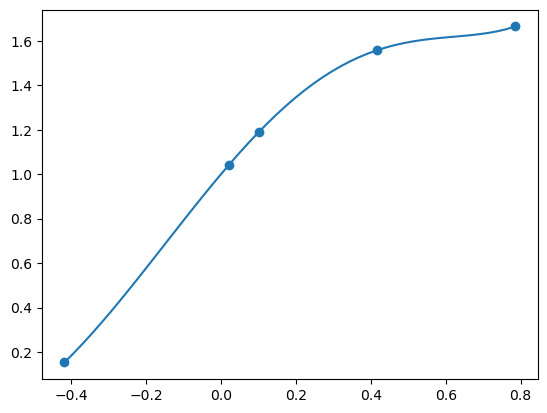

In [15]:
print(X_3_3)
print(y_3_3)
x_space = np.linspace(min(X_3_3), max(X_3_3))
plt.scatter(X_3_3, y_3_3)
plt.plot(x_space, [get_target_function_3_3()(x) for x in x_space])

(3) Nutzen Sie Ihren Code aus Aufgabe 3.1, um die Featuredaten nichtlinear mithilfe von `phi4` zu transformieren. Führen Sie dann auf diesen transformierten Daten mithilfe Ihres Codes eine lineare Regression durch und erhalten Sie damit den Gewichtsvektor $w_\text{lin}$.

In [21]:
X_transformed = np.array([ phi4(x) for x in X_3_3])
print(X_transformed)

w = linear_regression(X_transformed, y_3_3)

y_pred = X_transformed @ w

[[-4.18190522e-01  1.74883313e-01 -7.31345439e-02  3.05841731e-02]
 [ 2.16552104e-02  4.68948137e-04  1.01551706e-05  2.19912355e-07]
 [ 1.01595805e-01  1.03217076e-02  1.04864220e-03  1.06537648e-04]
 [ 4.16295645e-01  1.73302064e-01  7.21448947e-02  3.00336055e-02]
 [ 7.85893909e-01  6.17629236e-01  4.85391054e-01  3.81465873e-01]]


(4) Visualisieren Sie mithilfe von `get_final_g` Ihre aus Schritt (3) ermittelte finale Hypothese sowie zusätzlich im selben Plot die Target Function. Was fällt Ihnen auf? Fokussieren Sie sich auf zwei Untersuchungen:
1. Beschreibt Ihre finale Hypothese Ihre Daten $\mathcal{D}$ gut oder schlecht?
2. Beschreibt Ihre finale Hypothese die Target Function gut oder schlecht?

(5) Bestimmen Sie - wie in Übung 3.2 Schritt (5) den Out-of-Sample Fehler $E_\text{out}$ im Interval $x\in[-1, 1]$.

(6) Wiederholen Sie Schritte (3) und (5) für Polynomordnungen $Q_f \in \{4, \ldots, 12\}$ und visualisieren Sie den Out-of-Sample Fehler $E_\text{out}$ als Funktion der Polynomordnung $Q_f$.

* Hinweis: Nutzen Sie in allen Ihren Experimenten dieselbe nichtlineare Featuretransformation `phi4`.

(7) **Nutzen Sie Begriffe aus der Vorlesung, um die Phänomene, die Sie in Schritt (6) beobachtet haben, zu beschreiben.** Nennen Sie die Ursache für das Phänomen, das Sie beobachtet haben.